# Proyecto: Análisis de mercado inmobiliario

# Matias Davico

* Cuarto proyecto de Acámica.

En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para tratar de predecir el precio de venta de alguna propiedad, en mi opinión deberíamos tener en cuenta los siguientes datos: 

* Ubicación de la propiedad.
* Superficie cubierta y total.
* Cantidad de cuartos y baños.
* Servicios con los que cuenta.
* Antiguedad y Estado general de la propiedad.
* ¿Amoblado?
* Materiales de la construcción.
* Caracteristicas cercanas de la propiedad (ruidos, vecinos, olores, etc).

Los datos están en orden de importancia, empezando por lo que más tendríamos en cuenta a la hora de intentar predecir un precio.


---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.


In [1]:
# Importamos librerias.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Cargamos el dataset
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('En nuestro archivo tenemos:', df.shape[0], 'filas y', df.shape[1], 'columnas.')


En nuestro archivo tenemos: 146660 filas y 19 columnas.


In [3]:
# Chequeamos todas las columnas 
print(f"Columnas: {list(df.columns)}")


Columnas: ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [4]:
# las primeras cinco instancias.
print(df.shape, '\n')
df.head()

(146660, 19) 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
# las últimas cinco instancias.
print(df.shape, '\n')
df.tail()

(146660, 19) 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta
146659,2019-07-31,2019-10-12,2019-07-31,-34.444760,-58.981885,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,3.0,2.0,1.0,75.0,75.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",Departamento,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
# Aquí veremos las diferentes columnas con las que contamos y la cantidad de datos faltantes para tener en cuenta en el futuro.
print('Los nombres de las columnas son: ')
print('\n', df.columns)
print()
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
    print("Recuento de valores nulos por columna: ")
    for name, miss_vals in miss_values_count.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
              f"{miss_vals} dato{'s' if p else ''}.")


Los nombres de las columnas son: 

 Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Número de columnas con datos faltantes: 5
Recuento de valores nulos por columna: 
  - A la columna 'lat' le faltan 9925 datos.
  - A la columna 'lon' le faltan 9959 datos.
  - A la columna 'bathrooms' le faltan 5957 datos.
  - A la columna 'surface_total' le faltan 20527 datos.
  - A la columna 'surface_covered' le faltan 21614 datos.


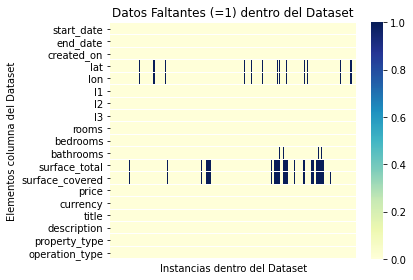

In [7]:
# Mapa de calor donde se observan la cantidad de datos faltantes.
Dat = df.isnull()
heat = sns.heatmap(Dat.T, cmap = "YlGnBu", xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()

In [8]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [9]:
# Chequeamos los datos que podrían estar duplicados.
duplicatesrows = df[df.duplicated()]
print('Numero de datos duplicados: ', duplicatesrows.shape)

duplicatesrows.head(10)

Numero de datos duplicados:  (2358, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
40,2019-10-17,2019-10-22,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
48,2019-10-17,2019-10-27,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
51,2019-10-17,2019-11-15,2019-10-17,-34.577746,-58.431085,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,46.0,40.0,145000.0,USD,U$S 145.000 - 2 amb en Duplex - Palermo - Char...,Charcas 5200Palermo2 ambientes en Dúplex.45.68...,Departamento,Venta
55,2019-10-17,2019-11-27,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
75,2019-10-17,2019-10-22,2019-10-17,-34.573835,-58.450378,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta
77,2019-10-17,2019-10-22,2019-10-17,-34.573835,-58.450378,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta
149,2019-10-17,2019-12-23,2019-10-17,-34.404367,-58.702364,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,97.0,81.0,240000.0,USD,Hermoso departamento de 3 ambientes con vista ...,"Hall de entrada. living comedor, salida a ampl...",Departamento,Venta
287,2019-10-17,2019-12-10,2019-10-17,-34.579319,-58.408229,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,122.0,110.0,405000.0,USD,"Departamento de 4 amb. con balcón, dependencia...","Semipiso. Living comedor , tres dormitorios ( ...",Departamento,Venta


In [10]:
# Una pequeña descripción del archivo para observar por ejemplo promedios, recuentos, desviación estandar entre los más destacables.
round(df.describe(),2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


**Comentario:** 
* Podemos observar que faltan aproximadamente el 15% de los datos en superficie cubierta y superficie total, en mi opinión esto es un punto a destacar ya que, sin haber hecho la predicción aún, considero que son bastantes instancias sin datos que van afectar más tarde en nuestra conclusión. Debería tratar de poder detectarlos y quitarlos al momento de desarrollar la predicción.
* Por otro lado, encontramos un poco más de 2000 instancias duplicadas. Esto puede ser algún error o pueden ser dos departamentos exactamente iguales en el mismo edificio. En un principio pensé en eliminarlos del dataset pero consideré que, si estos datos no eran erróneos, quitaríamos datos que nos podrían ser útiles.
* Por último, podemos notar cosas curiosas en la pequeña descripcion del dataset. Como por ejemplo un mínimo de 1 m2 de superficie cubierta, un máximo de 15 baños, etc. Sin dudas llama la atención por lo que debemos filtrar los outliers. 

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [11]:
 # Recuento de cada tipo de propiedad.
print('Los diferentes tipos de propiedades con los que contamos son: ')
print('   -  ',df["property_type"].unique(),'\n')
print('En total tenemos', len(df.property_type.unique()), 'tipos de propiedades. \n ')
print('Tipo de prop. |  Cant de propiedades\n')
print(df["property_type"].value_counts(),'\n')

Los diferentes tipos de propiedades con los que contamos son: 
   -   ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito'] 

En total tenemos 10 tipos de propiedades. 
 
Tipo de prop. |  Cant de propiedades

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64 



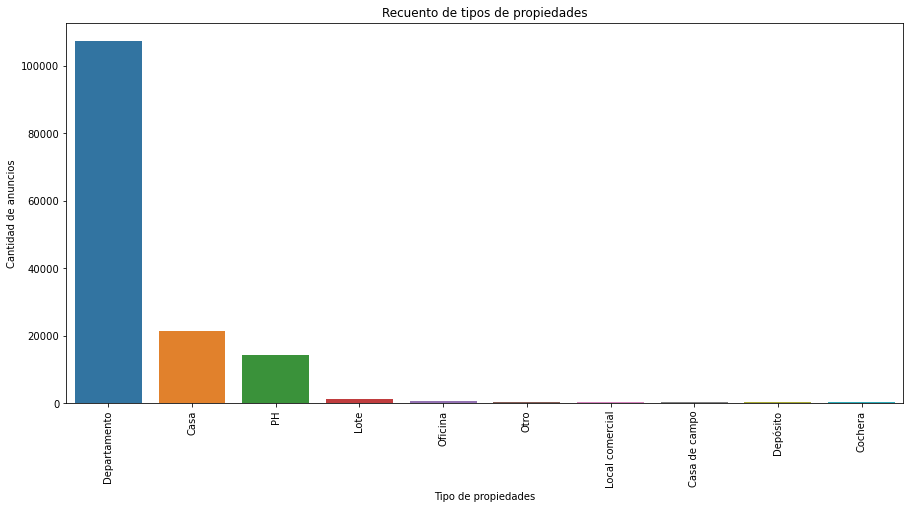

In [12]:
# Gráfico de barras donde podríamos predecir a que tipo de propiedad se dedica la inmobiliaria o lo que más tiene disponible en ese momento.
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'property_type', order = df['property_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Recuento de tipos de propiedades')
plt.xlabel('Tipo de propiedades')
plt.ylabel('Cantidad de anuncios')
plt.show()

In [13]:
# Promedio del valor por tipo de propiedad.
print('Promedio del valor del terreno por tipo de propiedad:\n')
df.groupby('property_type')['price'].mean().round(2)

Promedio del valor del terreno por tipo de propiedad:



property_type
Casa               275932.85
Casa de campo      212242.83
Cochera             24255.98
Departamento       236746.74
Depósito           885932.08
Local comercial    449184.06
Lote               386830.37
Oficina            183674.57
Otro               671686.70
PH                 188493.52
Name: price, dtype: float64

In [14]:
# Promedio de superficie totalpor tipo de propiedad.
print('Promedio de la superficie del terreno por tipo de propiedad:\n')
df.groupby('property_type')['surface_total'].mean().round(2)

Promedio de la superficie del terreno por tipo de propiedad:



property_type
Casa                660.10
Casa de campo      4018.58
Cochera              13.50
Departamento         99.19
Depósito            624.38
Local comercial     258.58
Lote               2481.00
Oficina              81.96
Otro               8249.77
PH                  172.98
Name: surface_total, dtype: float64

**Comentario:** 
* En este punto lo que podemos comenzar a deducir, es que la inmobiliaria Properati se dedica esencialmente al negocio de Departamentos y en segunda medida a los PH y Casas. Aunque tambien, tenemos que contemplar la opción de que al momento de obtener esta base de datos contaban con esta disponibilidad únicamente. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64 



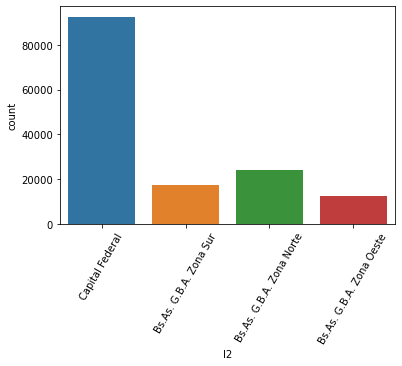

In [15]:
# Gráfico comparativo entre las propiedades y sus zonas.
print(df["l2"].value_counts(),'\n')
gr = sns.countplot(data = df, x = "l2")
plt.xticks(rotation=60)
plt.show()

In [16]:
# Promedio del valor de la propiedad por zona.
print('Promedio de precio por zona:\n')
df.groupby('l2')['price'].mean().round(2)

Promedio de precio por zona:



l2
Bs.As. G.B.A. Zona Norte    241528.79
Bs.As. G.B.A. Zona Oeste    156328.92
Bs.As. G.B.A. Zona Sur      195350.77
Capital Federal             261272.12
Name: price, dtype: float64

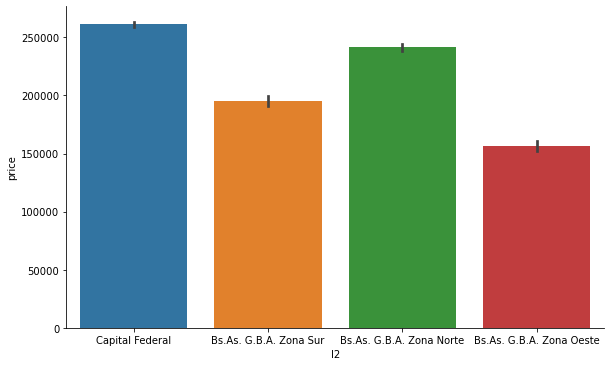

In [17]:
# Grafico para observar el promedio del valor por zona.
graf1 = sns.catplot(data = df, x = 'l2', y = 'price', kind = 'bar')
graf1.fig.set_figwidth(10)

In [18]:
# Promedio del superficie total de la propiedad por zona.
print('Promedio de superficie del terreno por zona:\n')
df.groupby('l2')['surface_total'].mean().round(2)

Promedio de superficie del terreno por zona:



l2
Bs.As. G.B.A. Zona Norte    392.70
Bs.As. G.B.A. Zona Oeste    408.55
Bs.As. G.B.A. Zona Sur      468.94
Capital Federal             113.73
Name: surface_total, dtype: float64

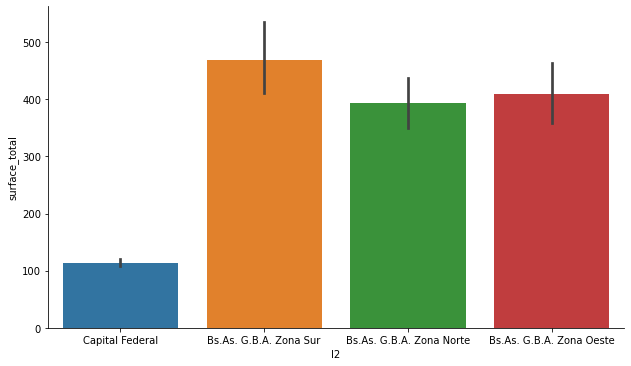

In [19]:
# Grafico para observar el promedio de la superficie total por zona.
graf2 = sns.catplot(data = df, x = 'l2', y = 'surface_total', kind = 'bar')
graf2.fig.set_figwidth(10)

In [20]:
# Los barrios en los que opera y sus disponibilidad en cada uno.
print('Tenemos estos', len(df.l3.unique()), 'barrios diferentes: \n ')
print(df["l3"].unique(),'\n')
print('Los primeros 40 en disponibilidad:\n')
print(df["l3"].value_counts().nlargest(40),'\n')


Tenemos estos 89 barrios diferentes: 
 
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 

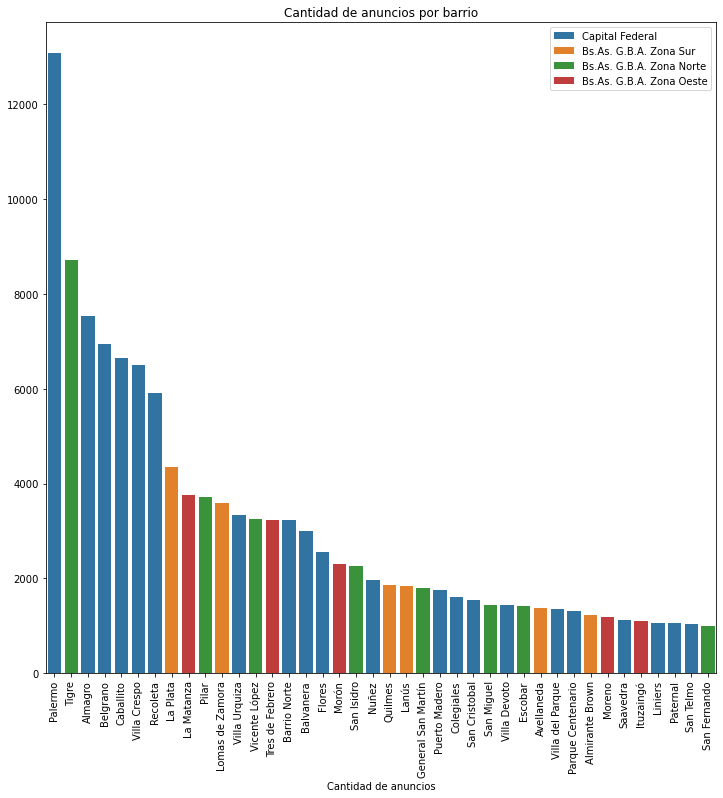

<function matplotlib.pyplot.show(close=None, block=None)>

In [21]:
# Gráfico comparativo entre las propiedades, sus barrios y sus zonas.
plt.figure(figsize = (20,10))
plt.subplot(1,2,2)
sns.countplot(x = 'l3', hue = 'l2', data = df, dodge = False,
             order = df['l3'].value_counts().nlargest(40).index)
plt.title('Cantidad de anuncios por barrio')
plt.xlabel('Cantidad de anuncios')
plt.ylabel('')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.show

In [22]:
print('Promedio del valor de los barrios mas caros: \n')
df.groupby('l3')['price'].mean().round(2).nlargest(40)

Promedio del valor de los barrios mas caros: 



l3
Puerto Madero          984679.03
Villa Riachuelo        535988.07
Las Cañitas            469045.20
Recoleta               410252.23
Belgrano               376293.66
Palermo                354750.97
Ezeiza                 343766.57
Retiro                 334344.50
Cañuelas               326566.67
San Isidro             322497.66
Vicente López          306221.39
Nuñez                  305570.16
Barrio Norte           295346.31
Esteban Echeverría     290877.02
Tigre                  260613.27
Villa Devoto           249394.07
Almirante Brown        243656.01
San Vicente            236602.75
Berazategui            230620.19
Pilar                  225396.70
Presidente Perón       225170.81
Barracas               224787.98
General Rodríguez      224554.92
Villa Ortuzar          224251.56
Lomas de Zamora        223398.78
Coghlan                221403.55
Colegiales             219024.60
Caballito              218500.36
Escobar                215572.39
Monserrat              206709.96
Villa U

In [23]:
print('Promedio de superficie total de los barrios con propiedades mas grandes: \n')
df.groupby('l3')['surface_total'].mean().round(2).nlargest(40)

Promedio de superficie total de los barrios con propiedades mas grandes: 



l3
Marcos Paz             8286.42
Cañuelas               4279.99
San Vicente            2953.45
General Rodríguez      2758.29
Presidente Perón       1561.67
Merlo                   984.87
José C Paz              953.88
Moreno                  935.49
Escobar                 863.89
Ezeiza                  758.08
Malvinas Argentinas     748.47
Pilar                   671.80
San Miguel              589.16
Almirante Brown         541.63
La Plata                523.92
Florencio Varela        489.16
Esteban Echeverría      487.55
Ituzaingó               450.03
Berazategui             410.56
Hurlingham              404.42
San Fernando            327.81
Lomas de Zamora         315.90
Tigre                   293.70
General San Martín      285.67
Morón                   245.96
Quilmes                 236.91
Pompeya                 224.05
Vicente López           222.97
San Isidro              200.99
Villa Lugano            194.93
Avellaneda              193.82
La Matanza              173.86
Villa

**Comentario:** 
* Como podemos notar, la mayor disponibilidad se encuentra en CABA y en Zona Norte, más precisamente en Tigre, donde curiosamente estas dos zonas son las más caras. 
* También podemos destacar los promedios de superficie total, donde se puede observar que solo encontramos pocos barrios con grandes números. Esto demuestra, una vez más, el tipo de propiedad con lo que contamos en nuestro dataset, departamentos.
* Vemos que el ranking de valor lo lidera CABA, junto con Zona Norte, lo cual era lo esperable. Por otro lado, podemos mencionar las superficies de cada barrio liderandola Zona Sur donde seguramente tendremos más casas y casas de campo, y CABA es la menor ya que seguramente se encuentran todos los departamentos.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [24]:
# Hacemos el filtro
filtro = df[df.l2.isin(['Capital Federal']) & df.property_type.isin(['PH', 'Departamento', 'Casa'])]
filtro.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [25]:
# Chequeamos en que moneda estan las propiedades
list(df.currency.unique())

['USD']

In [26]:
# Si hay algun otro tipo de operacion.
list(df.operation_type.unique())

['Venta']

In [27]:
# Si tenemos propiedades en otro pais .
list(df.l1.unique())

['Argentina']


* En esta ocasión, para un mejor análisis de datos, estudiamos la moneda en la que se trabaja en todas las propiedades y el tipo de operación. De esta forma, nos dimos cuenta que todas las propiedades son para vender y estan expresadas en USD, lo cual facilita la lectura de los datos. 
* Tambien que todas estaban en Argentina, por lo que podemos eliminar una columna para contar con menos información y el programa sea más liviano.


In [28]:
# Hacemos primero una limpieza de datos
filtro = filtro.drop(['start_date', 'end_date', 'created_on', 'lat','lon', 'operation_type','currency','l1'], axis=1)
filtro.shape

(91485, 11)

In [29]:
filtro.count()

l2                 91485
l3                 91485
rooms              91485
bedrooms           91485
bathrooms          89314
surface_total      82568
surface_covered    82250
price              91485
title              91485
description        91485
property_type      91485
dtype: int64

In [30]:
filtro.isnull().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
title                 0
description           0
property_type         0
dtype: int64

In [31]:
filtro_2 = filtro.dropna()
filtro_2.count()

l2                 81210
l3                 81210
rooms              81210
bedrooms           81210
bathrooms          81210
surface_total      81210
surface_covered    81210
price              81210
title              81210
description        81210
property_type      81210
dtype: int64

* En este punto me detuve, y quise ver la cantidad de instancias que teníamos algún elemento nulo y en que columna se encontraban. Me pareció lo más lógico eliminar todas estas instancias, porque podrían afectar a la predicción, más en lugares tan importantes como lo son la superficie total y cubierta y cantidades de baños por qué no. 

**Detección de Outliers**
Antes que nada, quería explicar que entiendo el tema de los cuartiles, los bigotes, etc. Entiendo para qué sirven y cómo se usan, pero en este caso me pareció mejor estudiar los outliers de cada variable, observarlas e ir quitandolas a ojo.

Lo primero que hago es chequear que la superficie total sea mayor que la superficie cubierta, ya que no tendría ningún sentido que fuera al revés, pero como vemos encontramos algunos datos de este estilo.

In [32]:
superficies = filtro_2[filtro_2.surface_covered <= filtro_2.surface_total]
superficies.shape

(80458, 11)

<AxesSubplot:xlabel='price'>

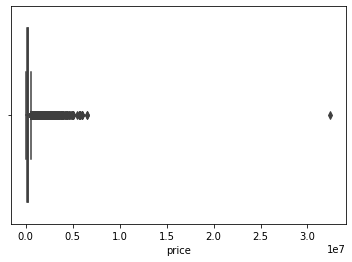

In [33]:
# Detectar outliers
sns.boxplot(x = superficies['price'])

<AxesSubplot:xlabel='surface_total'>

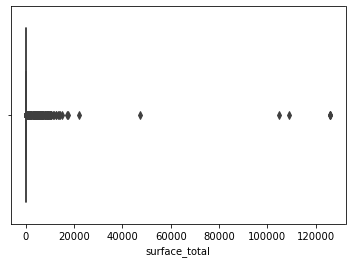

In [34]:
sns.boxplot(x = superficies['surface_total'] )

<AxesSubplot:xlabel='bedrooms'>

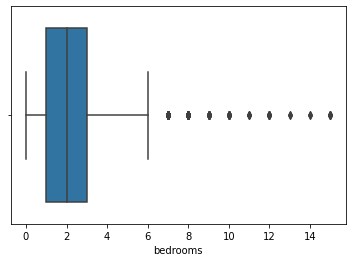

In [35]:
sns.boxplot(x = superficies['bedrooms'])

<AxesSubplot:xlabel='bathrooms'>

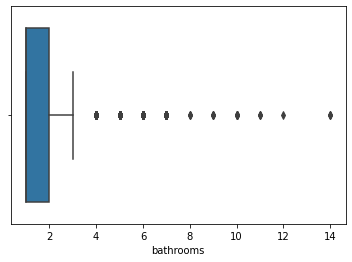

In [36]:
sns.boxplot(x = superficies['bathrooms'])

* Acabamos de ver un boxplot de cada variable y vemos que encontramos valores "raros" si se quiere, en todas las columnas, por lo que voy a proceder a limpiarlos. 
* El objetivo consiste en detectar estos valores y eliminarlos, para tener un dataset más comprensible si se quiere. Esto va ayudar a entender mejor los gráficos y mejorar la predicción.

**Baños**

In [37]:
capital_federal_bathr = superficies[superficies.bathrooms < 5]
capital_federal_bathr.shape

(79649, 11)

<AxesSubplot:xlabel='bathrooms'>

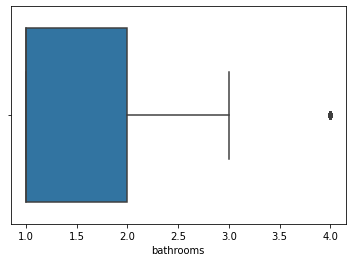

In [38]:
sns.boxplot(x = capital_federal_bathr['bathrooms'] )

**Piezas**

In [39]:
capital_federal_bedr = capital_federal_bathr[capital_federal_bathr.bedrooms < 6]
capital_federal_bedr.shape

(79244, 11)

<AxesSubplot:xlabel='bedrooms'>

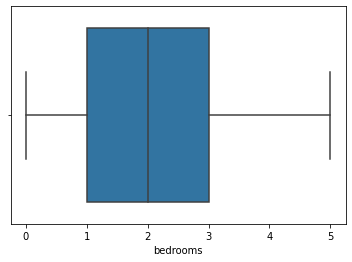

In [40]:
sns.boxplot(x = capital_federal_bedr['bedrooms'] )

**Superficie total**

In [41]:
capital_federal_sup = capital_federal_bedr[np.logical_and(capital_federal_bedr.surface_total > 15, capital_federal_bedr.surface_total < 250)]
capital_federal_sup.shape

(75906, 11)

<AxesSubplot:xlabel='surface_total'>

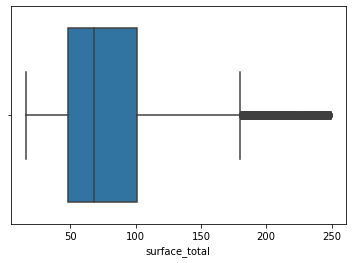

In [42]:
sns.boxplot(x = capital_federal_sup['surface_total'] )

**Superficie Cubierta**

In [43]:
capital_federal_cubi = capital_federal_sup[capital_federal_sup.surface_covered > 15]
capital_federal_cubi.shape

(75865, 11)

<AxesSubplot:xlabel='surface_covered'>

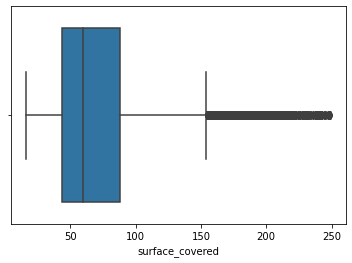

In [44]:
sns.boxplot(x = capital_federal_cubi['surface_covered'] )

**Precio**

In [45]:
capital_federal = capital_federal_cubi[np.logical_and(capital_federal_cubi.price > 50000, capital_federal_cubi.price < 500000)]
capital_federal.shape

(71191, 11)

* Una vez eliminados los outliers, vuelvo a tirar los boxplot de cada variable y vemos gráficos muchos más comprensibles.

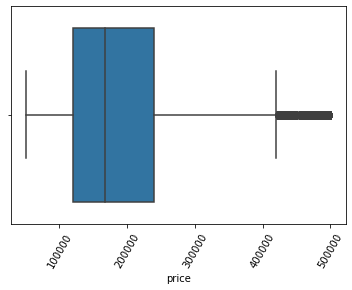

In [46]:
z = sns.boxplot(x = capital_federal['price'] )
plt.xticks(rotation=60)
plt.show()

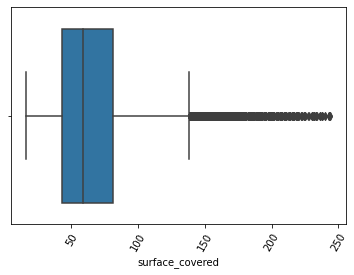

In [47]:
z = sns.boxplot(x = capital_federal['surface_covered'] )
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

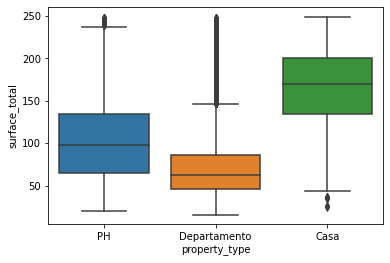

In [48]:
sns.boxplot(data = capital_federal, x = 'property_type', y = 'surface_total')

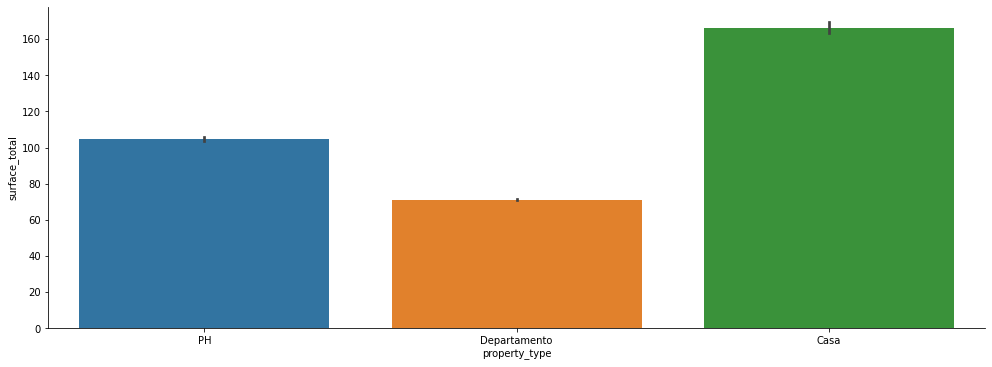

In [49]:
# promedio superficie total por propiedad
graf = sns.catplot(x='property_type', y='surface_total', data = capital_federal, kind ='bar')
graf.fig.set_figwidth(15)

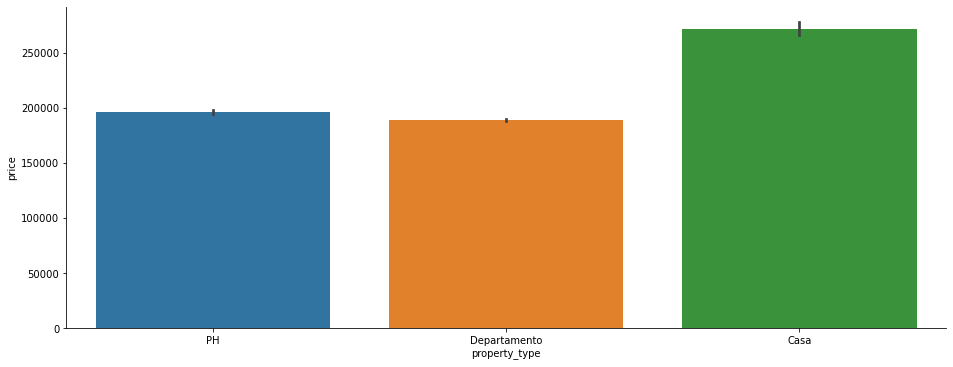

In [50]:
# promedio del valor por propiedad
graf = sns.catplot(x='property_type', y='price', data = capital_federal, kind ='bar')
graf.fig.set_figwidth(15)

* En los boxplot se puede ver una fuerte tendencia hacia el lado izquierdo, creo que esto se debe a la gran cantidad de departamentos con lo que cuenta este archivo por lo que tuvimos que descartar muchos outliers que contenian Casas y PH. Sin embargo pienso que es lo mejor para tratar de predecir el precio en esta ocasión.

In [51]:
"""sns.pairplot(data = capital_federal, hue = 'property_type')"""

"sns.pairplot(data = capital_federal, hue = 'property_type')"

* Una pequeña correlacion entre las variables aunque despues lo veremos un poco más claro reflejado en el heatmap.

In [52]:
# Nueva descipción del dataset, un poco más comprensible.
capital_federal.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,71191.00,71191.00,71191.00,71191.00,71191.00,71191.00
mean,2.79,1.83,1.39,76.47,66.96,191242.16
std,1.05,0.87,0.63,39.68,32.56,94793.27
min,1.00,0.00,1.00,16.00,16.00,50500.00
25%,2.00,1.00,1.00,48.00,43.00,120000.00
50%,3.00,2.00,1.00,66.00,59.00,166900.00
75%,3.00,2.00,2.00,94.00,81.00,240000.00
max,21.00,5.00,4.00,249.00,244.00,499999.00


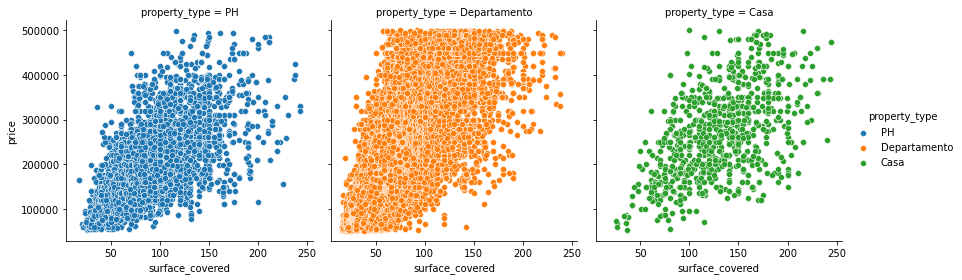

In [53]:
# Distribución por propiedad.
grid = sns.FacetGrid(capital_federal, col = 'property_type',hue = 'property_type',col_wrap = 3, height = 4, aspect = 1)
grid.map(sns.scatterplot, 'surface_covered','price')

grid.add_legend()

plt.show()

In [54]:
print(capital_federal["property_type"].value_counts(),'\n')

Departamento    61774
PH               8423
Casa              994
Name: property_type, dtype: int64 



* Podemos darnos cuenta lo que marcabamos anteriormente, el gran predominio de departamentos en nuestro archivo, seguido de PH. Por último, las casas, que a mi parecer contamos con muy pocos datos para poder predecir el precio de las mismas.

<AxesSubplot:xlabel='price', ylabel='Count'>

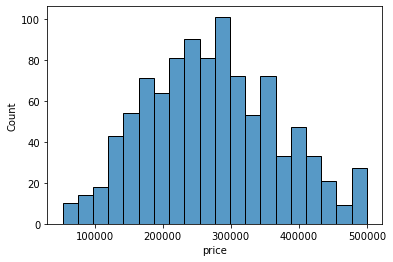

In [55]:
casas = capital_federal['property_type'] == 'Casa'
casa = capital_federal[casas]
sns.histplot(data = casa, x = 'price', bins = 20)

<AxesSubplot:xlabel='price', ylabel='Count'>

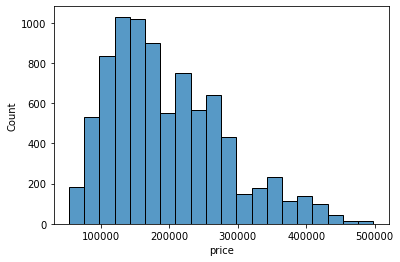

In [56]:
phs = capital_federal['property_type'] == 'PH'
ph = capital_federal[phs]
sns.histplot(data = ph, x = 'price', bins = 20)

<AxesSubplot:xlabel='price', ylabel='Count'>

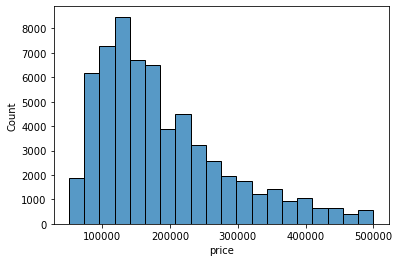

In [57]:
deptos = capital_federal['property_type'] == 'Departamento'
depto = capital_federal[deptos]
sns.histplot(data = depto, x = 'price', bins = 20)

In [58]:
print('Con outliers:', filtro.shape[0], 'filas y', filtro.shape[1], 'columnas.')
print('Sin outliers:', capital_federal.shape[0], 'filas y', capital_federal.shape[1], 'columnas.\n')
print('Después de eliminar propiedades con datos faltantes, columnas que no nos sirven en nuestro estudio y outliers, hemos eliminado', (filtro.shape[0] - capital_federal.shape[0]), 'instancias.')

Con outliers: 91485 filas y 11 columnas.
Sin outliers: 71191 filas y 11 columnas.

Después de eliminar propiedades con datos faltantes, columnas que no nos sirven en nuestro estudio y outliers, hemos eliminado 20294 instancias.


* En estos tres ultimos gráficos podemos observar hacia donde tienden los precios para cada tipo de propiedad.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<AxesSubplot:>

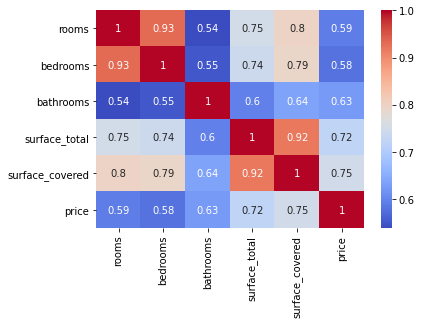

In [59]:
# Heatmap sin distinguir por propiedad
c= capital_federal.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)

* Notamos una relacion predominante en la superficie (esto sin discriminar por tipo de propiedad).

<AxesSubplot:ylabel='property_type-None'>

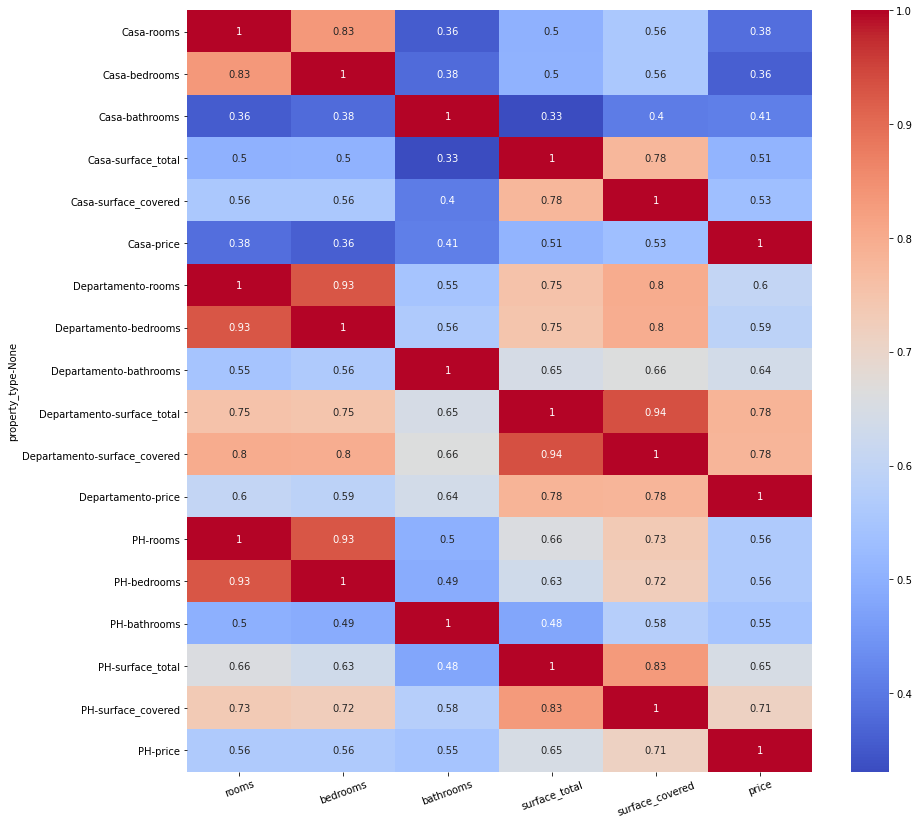

In [60]:
# Heat map por propiedad
plt.figure(figsize=(14,14))
c= capital_federal.groupby('property_type').corr()
plt.xticks(rotation = 20)
plt.yticks(rotation = 45)
sns.heatmap(c, cmap='coolwarm',annot=True)

* Separe por propiedad y notamos que los departamentos cuentan con los mayores numeros de correlación, lo que me hace dudar si realmente esto es asi o si nos faltan datos de Casas y Phs para lograr una correlación más clara.

In [61]:
# Correlaciones entre variables por propiedad
capital_federal.groupby('property_type').corr().round(3)

rooms  bedrooms  bathrooms  surface_total  \
property_type                                                              
Casa          rooms            1.000     0.833      0.355          0.503   
              bedrooms         0.833     1.000      0.378          0.504   
              bathrooms        0.355     0.378      1.000          0.331   
              surface_total    0.503     0.504      0.331          1.000   
              surface_covered  0.557     0.558      0.404          0.779   
              price            0.384     0.361      0.411          0.508   
Departamento  rooms            1.000     0.929      0.548          0.753   
              bedrooms         0.929     1.000      0.564          0.747   
              bathrooms        0.548     0.564      1.000          0.647   
              surface_total    0.753     0.747      0.647          1.000   
              surface_covered  0.800     0.796      0.665          0.936   
              price            0.605     0.591      0.638          0.784   
PH            rooms            1.000     0.928      0.500          0.660   
              bedrooms         0.928     1.000      0.493          0.633   
              bathrooms        0.500     0.493      1.000          0.479   
              surface_total    0.660     0.633      0.479          1.000   
              surface_covered  0.734     0.725      0.578          0.832   
              price            0.564     0.564      0.547          0.648   

                               surface_covered  price  
property_type                                          
Casa          rooms                      0.557  0.384  
              bedrooms                   0.558  0.361  
              bathrooms                  0.404  0.411  
              surface_total              0.779  0.508  
              surface_covered            1.000  0.532  
              price                      0.532  1.000  
Departamento  rooms                      0.800  0.605  
              bedrooms                   0.796  0.591  
              bathrooms                  0.665  0.638  
              surface_total              0.936  0.784  
              surface_covered            1.000  0.782  
              price                      0.782  1.000  
PH            rooms                      0.734  0.564  
              bedrooms                   0.725  0.564  
              bathrooms                  0.578  0.547  
              surface_total              0.832  0.648  
              surface_covered            1.000  0.713  
              price                      0.713  1.000

In [62]:
capital_federal.groupby('property_type')['surface_total'].mean().round(2)

property_type
Casa            166.44
Departamento     71.17
PH              104.72
Name: surface_total, dtype: float64

In [63]:
capital_federal.groupby('property_type')['price'].mean().round(2)

property_type
Casa            272152.19
Departamento    189190.60
PH              196739.98
Name: price, dtype: float64

In [64]:
capital_federal.groupby('property_type')['surface_covered'].mean().round(2)

property_type
Casa            130.07
Departamento     63.47
PH               85.07
Name: surface_covered, dtype: float64

* Por último, datos para conocer un poco más con que trabajamos.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:



In [65]:
# Cargamos el dataset
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('En nuestro archivo tenemos:', df.shape[0], 'filas y', df.shape[1], 'columnas.')

En nuestro archivo tenemos: 146660 filas y 19 columnas.


In [66]:
# Filtramos en capital federal y los 3 tipos de propiedades
dataset = df[df.l2.isin(['Capital Federal']) & df.property_type.isin(['PH', 'Departamento', 'Casa'])]
dataset = dataset.drop(['l1','l2' , 'start_date', 'end_date', 'created_on', 'lat','lon','currency','title','description','operation_type'], axis=1)
dataset

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [67]:
# Eliminamos las propiedades que tienen mas superficie cubierta que total.
dataset.drop(dataset[dataset.surface_covered > dataset.surface_total].index, inplace = True)
dataset

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [68]:
# detectamos los vlaores nulos
dataset.isnull().sum()

l3                    0
rooms                 0
bedrooms              0
bathrooms          2163
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

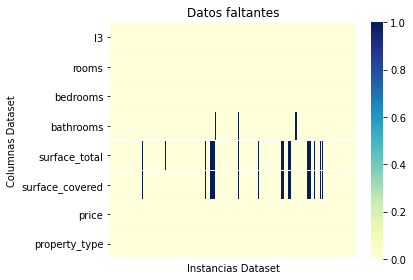

In [69]:
# hacemos un grafico para diferenciarlos visualmente
dat = dataset.isnull()
heat = sns.heatmap(dat.T, cmap = 'YlGnBu', xticklabels = False)
plt.title('Datos faltantes')
plt.xlabel('Instancias Dataset')
plt.ylabel('Columnas Dataset')
plt.tight_layout()

In [70]:
# Rellenamos los valores nulos con su promedio total
dataset['surface_covered'].fillna(dataset.groupby(['property_type','l3','rooms'])['surface_covered'].transform(pd.Series.mean),inplace=True)
dataset['surface_total'].fillna(dataset.groupby(['property_type','l3','rooms'])['surface_total'].transform(pd.Series.mean),inplace=True)
dataset['bathrooms'].fillna(dataset.groupby(['property_type','l3','rooms'])['bathrooms'].transform(pd.Series.mean),inplace=True)
dataset.dropna(inplace=True)

In [71]:
# observamos si se llenaron
dataset.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [72]:
# tomamos nocion dela cantidad de datos, promedios, std, min y max, entre otras cosas
dataset.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90678.00,90678.00,90678.00,90678.00,90678.00,90678.00
mean,2.96,1.96,1.56,110.91,90.61,259731.63
std,1.30,1.07,0.85,936.02,729.11,322994.59
min,1.00,0.00,1.00,12.00,1.00,6000.00
25%,2.00,1.00,1.00,49.00,44.00,121600.00
50%,3.00,2.00,1.00,71.00,62.91,175000.00
75%,4.00,3.00,2.00,112.00,95.00,279000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90678 entries, 0 to 146558
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l3               90678 non-null  object 
 1   rooms            90678 non-null  float64
 2   bedrooms         90678 non-null  float64
 3   bathrooms        90678 non-null  float64
 4   surface_total    90678 non-null  float64
 5   surface_covered  90678 non-null  float64
 6   price            90678 non-null  float64
 7   property_type    90678 non-null  object 
dtypes: float64(6), object(2)
memory usage: 6.2+ MB


* Despues de rellenar los valores nulos, observamos los nuevos valores que tenemos en nuestro dataset con el "describe", para ver los nuevos promedios, los máximos y mínimos (los cuales son bastantes curiosos en el tema de valores atípicos)
* Una vez rellenados, vemos los valores atipicos de cada columna y procedemos a sacarlos para tratar de trabajar con un dataset mas parejo y que nuestro modelo tenga menor margen de error
* Para sacarlos, al principio probamos con dos técnicas, donde me quedo con una que saca la mayor cantidad de outliers.

In [74]:
# outliers precio con metodo de las 3 sigmas
valor_medio = dataset.price.mean()
std = dataset.price.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(dataset.price < minimo, dataset.price > maximo)
print(minimo, maximo)

-709252.1491619145 1228715.411915835


In [75]:
mascara_outliers = (dataset.price < minimo) | (dataset.price > maximo)
mascara_outliers.sum()

1668

In [76]:
# outliers precio con metodo de los cuartiles
q25,q75 = np.percentile(dataset.price.values, [25,75])
iqr = q75 - q25
minimo1 = q25 - 1.5*iqr
maximo1 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo1, maximo1)

121600.0 279000.0 157400.0 -114500.0 515100.0


In [77]:
mascara_outliers1 = (dataset.price < minimo1) | (dataset.price > maximo1)
mascara_outliers1.sum()

7464

* Al principio me llamo la atención que al usar la regla de las 3 sigmas el mínimo me daba un numero negativo por lo cual probé la otra opción, la de los percentiles, pero observamos que tenemos el mínimo tambien negativo. 
* Voy a usar la regla de los percentiles, ya que creo que saca mayor cantidad de valores atípicos sin ser excesivos. De esta forma tenemos un dataset con valores un poco más acotado donde sin dudas mejoraría el margen de error.

In [78]:
# outliers superficie cubierta
q25,q75 = np.percentile(dataset.surface_covered.values, [25,75])
iqr = q75 - q25
minimo2 = q25 - 1.5*iqr
maximo2 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo2, maximo2)

44.0 95.0 51.0 -32.5 171.5


In [79]:
mascara_outliers2 = (dataset.surface_covered < minimo2) | (dataset.surface_covered > maximo2)
mascara_outliers2.sum()

6601

In [80]:
# outliers baños
q25,q75 = np.percentile(dataset.bathrooms.values, [25,75])
iqr = q75 - q25
minimo3 = q25 - 1.5*iqr
maximo3 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo3, maximo3)

1.0 2.0 1.0 -0.5 3.5


In [81]:
mascara_outliers3 = (dataset.bathrooms < minimo3) | (dataset.bathrooms > maximo3)
mascara_outliers3.sum()

3250

In [82]:
# outliers cuartos
q25,q75 = np.percentile(dataset.bedrooms.values, [25,75])
iqr = q75 - q25
minimo4 = q25 - 1.5*iqr
maximo4 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo4, maximo4)

1.0 3.0 2.0 -2.0 6.0


In [83]:
mascara_outliers4 = (dataset.bedrooms < minimo4) | (dataset.bedrooms > maximo4)
mascara_outliers4.sum()

258

In [84]:
# outliers superficie total
q25,q75 = np.percentile(dataset.surface_total.values, [25,75])
iqr = q75 - q25
minimo5 = q25 - 1.5*iqr
maximo5 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo5, maximo5)

49.0 112.0 63.0 -45.5 206.5


In [85]:
mascara_outliers5 = (dataset.surface_total < minimo5) | (dataset.surface_total > maximo5)
mascara_outliers5.sum()

6671

In [86]:
# outliers canitdad de habitaciones
q25,q75 = np.percentile(dataset.rooms.values, [25,75])
iqr = q75 - q25
minimo7 = q25 - 1.5*iqr
maximo7 = q75 + 1.5*iqr
print(q25,q75,iqr, minimo7, maximo7)

2.0 4.0 2.0 -1.0 7.0


In [87]:
mascara_outliers7 = (dataset.rooms < minimo7) | (dataset.rooms > maximo7)
mascara_outliers7.sum()

631

In [88]:
# deshechamos todos los outliers encontrados
df = dataset[np.logical_and(dataset.bathrooms > minimo3, dataset.bathrooms < maximo3)]
df2 = df[np.logical_and(df.bedrooms > minimo4, df.bedrooms < maximo4)]
df3 = df2[np.logical_and(df2.surface_covered > minimo2, df2.surface_covered < maximo2)]
df4 = df3[np.logical_and(df3.price > minimo1, df3.price < maximo1)]
df5 = df4[np.logical_and(df4.surface_total > minimo5, df4.surface_total < maximo5)]
df7 = df5[np.logical_and(df5.rooms > minimo7, df5.rooms < maximo7)]
df6 = df7[df7.surface_covered <= df7.surface_total]

* Una vez encontrados los valores outliers de cada columna, creamos un nuevo dataset descartando todas estas instancias y procedemos observar sus nuevos promedios, mínimo, máximos, etc

In [89]:
df6.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78599.00,78599.00,78599.00,78599.00,78599.00,78599.00
mean,2.69,1.75,1.36,73.70,64.26,184990.56
std,1.02,0.87,0.57,35.44,28.92,92894.89
min,1.00,0.00,1.00,12.00,1.00,7500.00
25%,2.00,1.00,1.00,47.00,42.00,115000.00
50%,3.00,2.00,1.00,65.00,57.63,160000.00
75%,3.00,2.00,2.00,91.00,80.00,235000.00
max,6.00,5.00,3.24,206.00,171.00,515000.00


In [90]:
df6.shape

(78599, 8)

* Estudiamos las gráficas para observar si queda algun que otro valor outlier

<AxesSubplot:xlabel='rooms'>

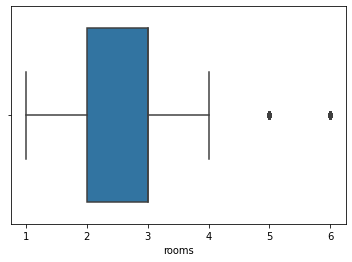

In [91]:
sns.boxplot(x = df6['rooms'] )

<AxesSubplot:xlabel='bedrooms'>

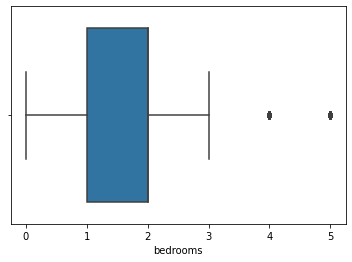

In [92]:
sns.boxplot(x = df6['bedrooms'] )

<AxesSubplot:xlabel='bathrooms'>

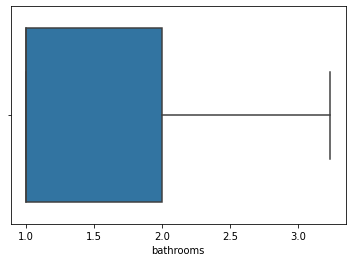

In [93]:
sns.boxplot(x = df6['bathrooms'] )

<AxesSubplot:xlabel='surface_total'>

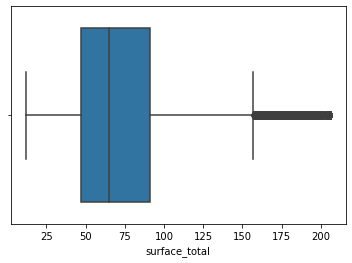

In [94]:
sns.boxplot(x = df6['surface_total'] )

<AxesSubplot:xlabel='surface_covered'>

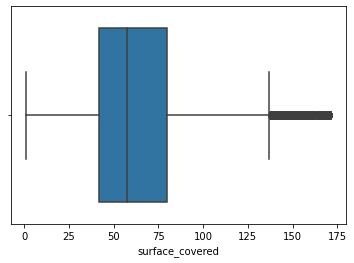

In [95]:
sns.boxplot(x = df6['surface_covered'] )

<AxesSubplot:xlabel='price'>

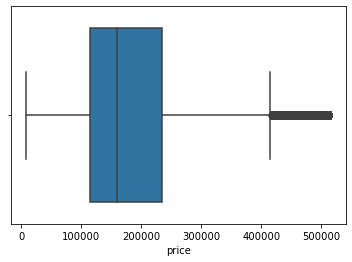

In [96]:
sns.boxplot(x = df6['price'] )

Text(0.5, 1.0, 'Correlacion en nuestro dataset.')

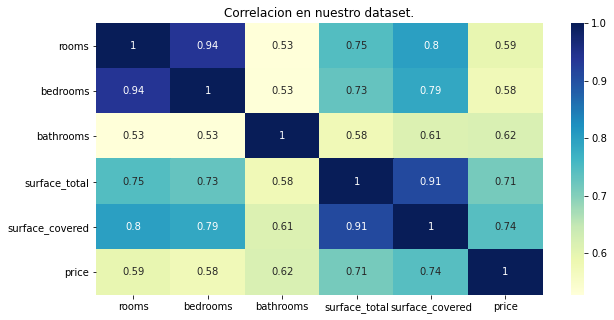

In [97]:
# creamos un heatmap para ver sus correlaciones
plt.figure(figsize = (10,5))
sns.heatmap(df6.corr(), annot=True, cmap = 'YlGnBu')
plt.title('Correlacion en nuestro dataset.')

In [98]:
# tipos de datos por columna
df6.dtypes

l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
property_type       object
dtype: object

In [99]:
# chequemaos los tipos de datos que sean objetos
s=(df6.dtypes=='object')
object_col=list(s[s].index)
print('caregorical values')
print(object_col)

caregorical values
['l3', 'property_type']


In [100]:
object_col

['l3', 'property_type']

# OneHotEncoder

In [101]:
# realizamos el one hot encoder para convertir los valores categoricos en numeros
ohe = OneHotEncoder()
enc_neighborhood = OneHotEncoder(handle_unknown='ignore')
enc_property_type = OneHotEncoder(handle_unknown='ignore')


In [102]:
# fiteamos
neighborhood_t = enc_neighborhood.fit_transform(df6[["l3"]]).toarray()
property_type_t = enc_property_type.fit_transform(df6[["property_type"]]).toarray()

In [103]:
# hacemos el pca
pca_pt =PCA(n_components = 3)
PCAproptype = pca_pt.fit_transform(property_type_t)
pca_barr = PCA(n_components=5)
PCAbarrios = pca_barr.fit_transform(neighborhood_t)

In [104]:
# cambiamos los datos de DataFrame a Numpy para concatenar con pca sin problemas 
otros_datos = df6[['bathrooms','surface_covered','surface_total','bedrooms','rooms', 'price']]
otros_datos.shape


(78599, 6)

In [105]:
otros_datos_np = otros_datos.to_numpy()
otros_datos_np.shape


(78599, 6)

In [106]:
# concatenamos
capital = np.concatenate([otros_datos_np, PCAproptype, PCAbarrios], axis=1)

In [107]:
# chequeamos tener valores numericos en todas las columnas
capital = pd.DataFrame(capital)
capital.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.0,58.0,70.0,1.0,2.0,159000.0,1.259428,-0.066487,1.032314e-12,-0.086404,-0.042453,-0.018685,0.039490,0.068075
1,1.0,45.0,45.0,1.0,2.0,125000.0,1.259428,-0.066487,-3.510266e-14,0.876829,0.063507,0.019860,-0.034649,-0.043647
2,1.0,50.0,85.0,1.0,2.0,295000.0,1.259428,-0.066487,-1.131292e-16,0.876829,0.063507,0.019860,-0.034649,-0.043647
3,1.0,56.0,56.0,1.0,2.0,150000.0,1.259428,-0.066487,-1.131292e-16,-0.205695,-0.356229,0.758850,-0.304790,-0.193746
4,1.0,70.0,70.0,1.0,2.0,159500.0,1.259428,-0.066487,-1.131292e-16,-0.205695,-0.356229,0.758850,-0.304790,-0.193746


In [108]:
# entrenamos el train y test (la columna 5 es la del precio por eso la tomamos como variable a predecir)
X, y= capital[[1,2,3,4,6,7,8,9,10,11,12,13]], capital[5]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51089, 12) (51089,) (27510, 12) (27510,)


In [110]:
# estandarizamos
scaler = StandardScaler()

In [111]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# Definimos las listas vacias para los valores de accuracy deseados
knn_rmse_train = []
knn_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    knn_rmse_train.append(train_acc)
    knn_rmse_test.append(test_acc)

Text(0.5, 0, 'Numero de Vecinos')

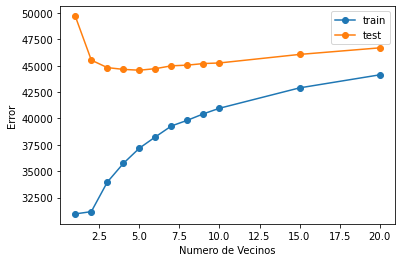

In [113]:
plt.plot(k_vecinos,knn_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,knn_rmse_test,'o-',label='test')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Numero de Vecinos')

In [114]:
knn_rmse_test

[49681.002866895215,
 45525.2632022735,
 44815.5732086833,
 44648.386130266765,
 44568.5784155965,
 44716.02780148776,
 44985.29925377811,
 45050.18944761075,
 45199.65409636985,
 45256.96157508249,
 46064.7044853496,
 46686.00624492656]

In [115]:
# Definimos las listas vacias para los valores de accuracy deseados
tree_rmse_train = []
tree_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,30,50]

# Generamos en loop sobre los distintos valores de k 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    tree_rmse_train.append(train_acc)
    tree_rmse_test.append(test_acc)

Text(0.5, 0, 'Profundidad del Arbol')

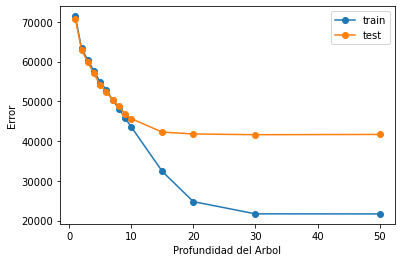

In [116]:
plt.plot(max_depths,tree_rmse_train,'o-',label='train' )
plt.plot(max_depths,tree_rmse_test,'o-',label='test')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Profundidad del Arbol')

In [117]:
tree_rmse_test

[70851.82437170309,
 62987.959288179256,
 59854.64856079781,
 57041.082031385566,
 54057.57143061764,
 52441.298868863414,
 50412.497054857035,
 48742.41254872329,
 46898.023966185436,
 45648.73637706445,
 42262.44402051401,
 41795.56745167097,
 41606.675444575536,
 41674.56235998104]

In [118]:
# entranamos otra vez el modelo de la misma forma que el proyecto anterior y vemos si hubo cambios notables
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=4)

In [119]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 57108.554498597856
Raíz del error cuadrático medio en Test: 56509.66595198928


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


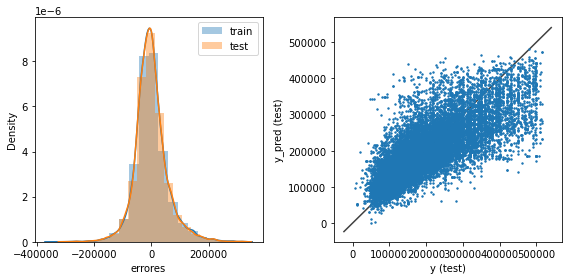

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 48190.07154083446
Raíz del error cuadrático medio en Test: 48742.41254872329


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


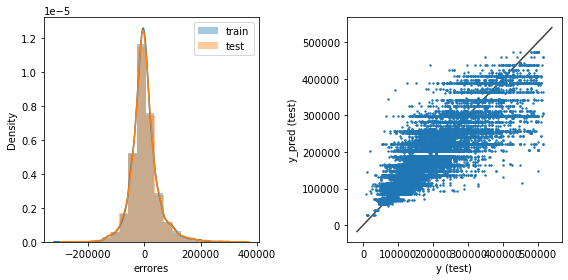

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 35740.818401460354
Raíz del error cuadrático medio en Test: 44648.386130266765


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


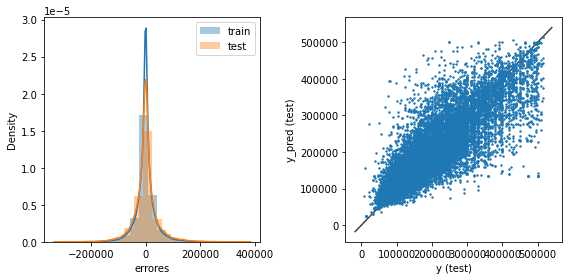

In [120]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Conclusion Etapa 1
**Resultados proyeto n°1**:



*  Modelo: Regresión lineal 

Raíz del error cuadrático medio en Train: 203172.57

Raíz del error cuadrático medio en Test: 206762.52

*  Modelo: Árbol de Decisión

Raíz del error cuadrático medio en Train: 181201.04

Raíz del error cuadrático medio en Test: 187491.40

 *  Modelo: Vecinos más cercanos

Raíz del error cuadrático medio en Train: 162697.46

Raíz del error cuadrático medio en Test: 180607.87


* Comparando los resultados de los tres modelos con respecto a los resultados obtenidos en el proyecto numero 1, podemos notar que mejoraron muchisimos los resultados obtenidos. Podemos pensar que estos mejores resultados se deben a las nuevas tecnicas que aplicamos a la transformacion de datos como primera etapa pero tambien hay que teneer en cuenta que sacamos más outliers y trabajamos con menos datos. De cualquier forma creo que son resultados mucho más razonables que los del proyecto anterior, igual se podría seguir mejorando.

# Etapa 2

* Entrenamos varios modelos a traves de optimización de hiperparametros y vemos que resultados arrojan

# Random Forest

In [121]:
# train test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(51089, 12) (51089,) (27510, 12) (27510,)


In [122]:
# estandarizamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
clf = RandomForestRegressor(random_state = 42)

In [124]:
#elegimos una serie de hiperparametros para ver con cual par se queda
parameters = {'max_depth':[1,10,30,50], 'n_estimators':[20,50,80,120]}


In [125]:
# realizamos el gridsearch para ver con que parametros se queda
model = GridSearchCV(clf, parameters)

In [126]:
model

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 30, 50],
                         'n_estimators': [20, 50, 80, 120]})

In [127]:
# fiteamos el modelo con los datos 
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 30, 50],
                         'n_estimators': [20, 50, 80, 120]})

In [128]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [129]:
# observamos los parametros que eligio grid search
model.best_params_

{'max_depth': 30, 'n_estimators': 120}

In [130]:
model.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=120, random_state=42)

In [131]:
'''FEATURE IMPORTANCES'''
importance_tree = model.best_estimator_.feature_importances_
for i,v in enumerate(importance_tree):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.56417
Feature: 1, Score: 0.19009
Feature: 2, Score: 0.01464
Feature: 3, Score: 0.01813
Feature: 4, Score: 0.01072
Feature: 5, Score: 0.00346
Feature: 6, Score: 0.00312
Feature: 7, Score: 0.08175
Feature: 8, Score: 0.01687
Feature: 9, Score: 0.02775
Feature: 10, Score: 0.05396
Feature: 11, Score: 0.01534


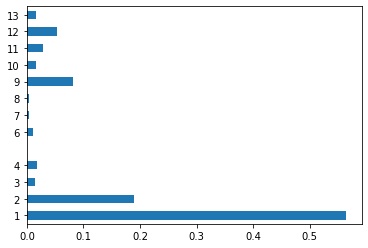

In [132]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [133]:
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

23689.584628260247
36448.78402330371


In [134]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''
rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train Random Forest: {rmse_train.round(2)}')
print(f'Raíz del error cuadrático medio en Test Random Forest: {rmse_test.round(2)}')


Raíz del error cuadrático medio en Train Random Forest: 23689.58
Raíz del error cuadrático medio en Test Random Forest: 36448.78


Raíz del error cuadrático medio en Train: 23689.584628260247
Raíz del error cuadrático medio en Test: 36448.78402330371


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


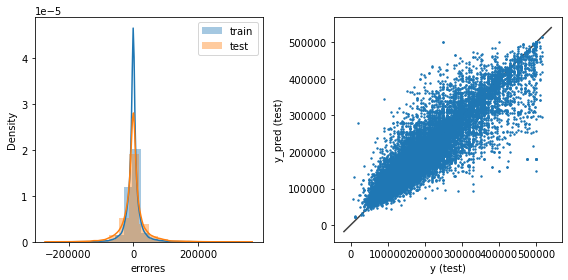

In [135]:
# análisis del error de los modelos
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

# XGBOOST

In [136]:
X, y= capital[[1,2,3,4,6,7,8,9,10,11,12,13]], capital[5]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)



(51089, 12) (51089,) (27510, 12) (27510,)


In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
xgbr = xgb.XGBRegressor()

In [140]:
parameters = {"max_depth":[5,10,15,20], "n_estimators":[15,20,30,35,40]}

In [141]:
model = GridSearchCV(xgbr, parameters)

In [142]:
model.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [143]:
model.best_params_

{'max_depth': 15, 'n_estimators': 30}

In [144]:
'''FEATURE IMPORTANCES'''
importance_tree = model.best_estimator_.feature_importances_
for i,v in enumerate(importance_tree):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13499
Feature: 1, Score: 0.09416
Feature: 2, Score: 0.01562
Feature: 3, Score: 0.02268
Feature: 4, Score: 0.04141
Feature: 5, Score: 0.01563
Feature: 6, Score: 0.11543
Feature: 7, Score: 0.07159
Feature: 8, Score: 0.05688
Feature: 9, Score: 0.11070
Feature: 10, Score: 0.31172
Feature: 11, Score: 0.00917


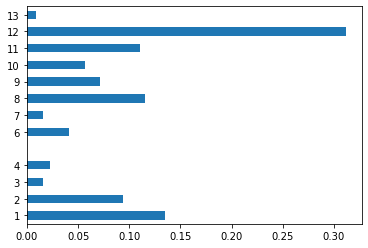

In [145]:
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [146]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

23354.47671575229
36694.337840155


In [147]:
# Evaluamos mediante el error cuadratico medio para comparar resultados
rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en train Xgboost {rmse_train.round(2)}')
print(f'Raíz del error cuadrático medio en Test Xgboost: {rmse_test.round(2)}')

Raíz del error cuadrático medio en train Xgboost 23354.48
Raíz del error cuadrático medio en Test Xgboost: 36694.34


Raíz del error cuadrático medio en Train: 23354.47671575229
Raíz del error cuadrático medio en Test: 36694.337840155


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


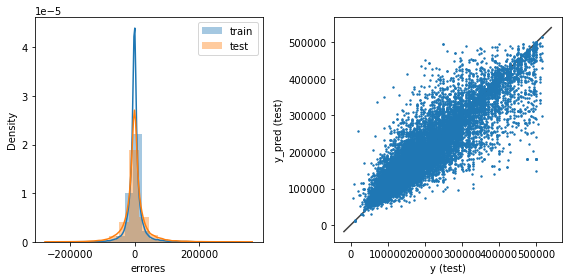

In [148]:
#  análisis del error de los modelos
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

# PARTE 3

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? 

* Creo que descontamos una cantidad significativa, tanto en el Random Forest como en el Xgboost. Entrenamos un modelo casi 10 veces mejor que el entrenado en el proyecto 1, por lo cual estoy bastante satisfecho.
* Aún asi, creo que los resultados que conseguimos siguen siendo bastantes confusos para poder asegurar la predicción de un valor de una propiedad, es decir, me parece que un margen, que ronda aproximadamente entre los +- 25.000 USD, es demasiado. De todas formas, creo que nuestro mejor modelo entrenado en este proyecto fue el Random Forest, eligiendo los hiperparametros a traves de un GridSearch, donde toma el mejor par de hiperparametros que nosotros definimos mediante un diccionario con distintas opciones.
* Cabe destacar que el GridSearch fue entrenado varias veces con diferentes valores dentro del diccionario para observar el comportamiento del mismo y elegir nuestra mejor opcion.
* Tambien es curioso cual fue la variable más importante para tratar de predecir el precio. En este caso, fueron los baños con una gran predominancia, pero tampoco podemos obviar el hecho de que la superficie cubierta influyó en alguna medida en los resultados.
* La variable que menos relevancia tuvo en este modelo fue el Precio y la cantidad de habitaciones, donde tiene sentido que el precio no tenga relevancia ya que lo que se busca es tratar de predecir el valor de una propiedad no conociendo este dato. Lo que si me sorprendió es la cantidad de habitaciones, ya que antes de empezar a entrenar el modelo supuse que iba ser una variable de las más importancia para tratar de entender de que tipo de casa o departamento estamos hablando.